# Data Analysis homework 2: Principal Component Analysis

by Skander Chouchene

In [1]:
# import necessary libraries
import pandas as pd # pandas
import seaborn as sns # seaborn package to generate nice plots
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy

In [2]:
# read data
data=pd.read_csv('tn_stock_data_2018.csv')
# convert date from string to datetime type
data.date=pd.to_datetime(data.date,format='%d/%m/%y')

In [3]:
data.head()

,date,C_GR_RLC,company_code,company,ref_price,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,I
0,2018-01-02,11,725001,ADWYA,5.35,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.50,NaN
1,2018-01-02,11,340005,AMEN BANK,24.35,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.00,NaN
2,2018-01-02,11,730001,ARTES,6.27,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.05,NaN
3,2018-01-02,11,714001,ASSAD,9.00,9.00,0.00,0.00,9.00,0.00,0.00,0,0,NaN,NaN
4,2018-01-02,11,360035,ATB,4.22,4.22,4.15,4.18,4.18,4.15,4.18,3705,7,15465.90,NaN


In [4]:
len(data.company.unique())

84

In [5]:
# calculate daily return for every company
data['currReturn']=data.groupby(['company'])['close'].pct_change()

In [6]:
data=data.drop("I",axis=1)
data=data.replace([np.inf, -np.inf], np.nan)

In [7]:
ret_data=data.pivot(index='date',columns='company',values='currReturn').dropna()

In [8]:
ret_data.head()

company,ADWYA,AETECH,AIR LIQUDE TSIE,ALKIMIA,AMEN BANK,AMI DA 1/4 110817,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,...,TELNET HOLDING,TPR,TUNINVEST-SICAR,TUNIS RE,TUNISAIR,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,-0.007421,0.039216,0.000000,0.000000,-0.000417,-0.138249,-0.025424,0.024590,-0.030303,-0.001111,...,0.013652,-0.022989,0.000000,-0.017857,-0.023256,0.004082,0.0,0.004089,0.019108,-0.002692
2018-01-04,0.037383,0.037736,-0.011236,-0.029989,-0.003752,0.000000,0.000000,0.001600,-0.045000,0.011123,...,0.026936,-0.032353,0.000000,0.030303,0.023810,0.056911,0.0,-0.004525,-0.002500,-0.029690
2018-01-05,0.005405,0.018182,0.002273,-0.044929,0.003347,0.000000,0.000000,0.000000,-0.018325,0.012101,...,0.013115,0.000000,0.029231,-0.012941,-0.023256,0.034615,0.0,0.000000,0.002506,-0.001391
2018-01-08,-0.014337,0.035714,0.000000,-0.023288,0.000000,0.005348,0.000000,-0.025559,0.058667,0.016304,...,0.009709,0.024316,0.000000,-0.021454,-0.023810,-0.014870,0.0,0.020000,0.025000,0.029248
2018-01-09,0.000000,0.000000,0.000000,0.000000,-0.000417,0.058511,0.000000,0.008197,-0.023929,0.014973,...,-0.012821,0.008902,-0.044843,-0.023143,0.000000,-0.026415,0.0,-0.001783,0.000000,-0.009472



### Principal Component Analysis

#### Question: Perform the principal component analysis to understand what is driving the variance of the returns for the 84 stocks in the provided dataset. Please try to perform an analysis along the lines of the analysis we saw in class in cells (20~27) from the PCA notebook. It is important that you try to intrepret the results of the PCA. You may want to try running the analysis for various combinations of industries and analyze the results you get. You can find the industries for all the stocks in Tunisia Stock Exchange in https://www.ilboursa.com/marches/secteurs.aspx


# I/ general PCA

#### In this first section, we are going to perform a general PCA to understand what is driving the variance in general.

In [73]:
from sklearn.decomposition import PCA
num_pc = 1

X = np.asarray(ret_data)

[n,m] = X.shape
print ('The number of timestamps is {}.'.format(n))
print ('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print ('{0:.2f}% of the variance is explained by the first PC'.format(percentage_cum[-1]*100))

pca_components = pca.components_

The number of timestamps is 247.
The number of stocks is 84.
99.99% of the variance is explained by the first PC


### => Interpretation:
#### Considering all data, the variance can be explained by just one principal component. While this is good pimarily (we won't need to train a model on many more variables), however it can mislead us as companies here are very different. If we need to work on a certain industry we need to isolate that dataframe and work on it.

# II/ PCA for banks

#### In this part, we will isolate bank data and perform PCA on it. We will isolate two datasets as well, banks vs dealerships and banks vs holdings, which we will need in the 3rd section.

In [75]:
bank=ret_data[["BIAT","UIB","BH","BNA","AMEN BANK","UBCI","ATB"]]
bank_vs_dealership=ret_data[["BIAT","UIB","BH","ARTES","ENNAKL AUTOMOBILES","CITY CARS"]]
bank_vs_holding=ret_data[["BIAT","UIB","BH","BNA","POULINA GP HOLDING","DELICE HOLDING","ONE TECH HOLDING"]]

X=np.asarray(bank)
X2=np.asarray(bank_vs_dealership)
X3=np.asarray(bank_vs_holding)

[n,m] = bank_vs_dealership.shape
print ('The number of timestamps is {}.'.format(n))

pca = PCA(n_components=4)
pca2 = PCA(n_components=4)
pca3 = PCA(n_components=4)

pca.fit(X)
pca2.fit(X2)
pca3.fit(X3)


percentage =  pca.explained_variance_ratio_
percentage2 =  pca2.explained_variance_ratio_
percentage3 =  pca3.explained_variance_ratio_

percentage_cum = np.cumsum(percentage)
percentage_cum2 = np.cumsum(percentage2)
percentage_cum3 = np.cumsum(percentage3)

print ('{0:.2f}% of the variance in bank returns is explained by the first 4 PCs'.format(percentage_cum[-1]*100))
print ('{0:.2f}% of the variance in banks vs dealerships returns is explained by the first 4 PCs'.format(percentage_cum2[-1]*100))
print ('{0:.2f}% of the variance in banks vs holdings returns is explained by the first 4 PCs'.format(percentage_cum3[-1]*100))

pca_components = pca.components_
pca_components2 = pca2.components_
pca_components3 = pca3.components_

The number of timestamps is 247.
77.40% of the variance in bank returns is explained by the first 4 PCs
81.36% of the variance in banks vs dealerships returns is explained by the first 4 PCs
93.75% of the variance in banks vs holdings returns is explained by the first 4 PCs


### => Interpretation:
#### Most of the variance in bank returns can be explained by just 4 PCs. This helps in training a model on banks only: when we have a dataset with a lot of rows, this helps us train a faster and accurate model.

In [45]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2","factor 3","factor 4"], 
                                columns=bank.columns,
                                data = pca.components_).T
factor_exposures

,factor 1,factor 2,factor 3,factor 4
company,,,,
BIAT,-0.494655,0.293074,-0.081825,-0.135517
UIB,-0.514173,0.235320,-0.115831,-0.531508
BH,-0.489587,0.270825,0.088172,0.779584
BNA,-0.466313,-0.828252,0.306055,-0.025932
AMEN BANK,-0.153566,-0.010069,-0.234955,-0.182082
UBCI,-0.046648,-0.312261,-0.903323,0.206591
ATB,-0.089667,0.042147,-0.085131,-0.121968


# III/ PCA between industries

#### In this final section, we are going to compare between several industries to understand the difference between them in terms of effecting factors.
#### We are going to perform PCA on 2 combinations of industries.

## 1) Banks VS Car dealerships:

In [46]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2","factor 3","factor 4"], 
                                columns=bank_vs_dealership.columns,
                                data = pca2.components_).T
factor_exposures

,factor 1,factor 2,factor 3,factor 4
company,,,,
BIAT,-0.580778,0.017675,-0.166443,0.363674
UIB,-0.583291,-0.149543,-0.313582,0.266032
BH,-0.565241,0.192553,0.516825,-0.609312
ARTES,-0.020811,-0.090299,-0.741413,-0.627827
ENNAKL AUTOMOBILES,-0.046638,-0.264375,-0.034853,-0.169517
CITY CARS,-0.019028,-0.928547,0.236532,-0.052955


### => Interpretation:
#### In this comparison, 4 factors affect most of the variance. As we can see, factor 1 clearly distinguishes between banks and car dealerships; taking negligeable values for the latter and higher values for banks. The same can be said for the 2nd PC. However, the 3rd and 4th PCs do not follow this trend, they are be a combination of other variables that indicate another aspect of the data.

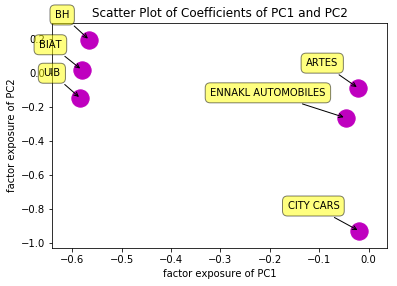

In [50]:
labels = factor_exposures.index
data = factor_exposures.values

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );



### => Observation
#### The PCA has yielding the components that differenciate well between companies on the basis of type: banks on the left and dealerships on the right.

## 2)Banks vs Holdings:

In [62]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2","factor 3","factor 4"], 
                                columns=bank_vs_holding.columns,
                                data = pca3.components_).T
factor_exposures

,factor 1,factor 2,factor 3,factor 4
company,,,,
BIAT,-0.016072,-0.495204,0.298308,0.169079
UIB,-0.005368,-0.514794,0.246762,-0.015621
BH,-0.005219,-0.493438,0.255691,-0.039693
BNA,-0.001767,-0.466426,-0.883085,-0.009411
POULINA GP HOLDING,-0.999832,0.014725,-0.006184,0.000803
DELICE HOLDING,-0.003898,-0.096793,0.058837,-0.942310
ONE TECH HOLDING,-0.001612,-0.138347,0.037480,0.285580


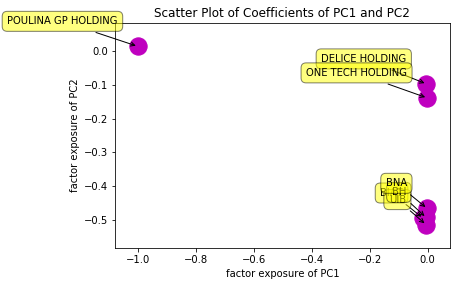

In [72]:
labels = factor_exposures.index
data = factor_exposures.values

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );



### => Interpretation
#### In this example, even if the PCA understood the difference between a bank and holding, it made an error by placing POULINA away from every other company. This is due to the fact that Poulina is an overachieving company and can be regarded as an outlier. Furthermore, Poulina holds a multitude of companies and therefore might behave differently in our dataset.
#### PS: I tried other factor combinations and there's always a difference between holdings. Sometimes Delice behaves differently as well. We can see this from the factor exposure table above. Therefore, the comparison here is not good. This is maybe due to the fact that a holding is a group of companies, and cannot be properly compared to one company.